In [3]:
import pandas as pd
import seaborn as sns   
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
file = "C:\\Users\\Usuario\\Documents\\CODIGO\\EVENT_SALUD\\DATA_salud_csv.csv"
data_salud = pd.read_csv(file, sep=";")

print(data_salud.isnull().sum())
data_salud



MES             0
UBIGEO          0
DEPARTAMENTO    0
PROVINCIA       0
DISTRITO        0
SECTOR          0
CATEGORIA       0
RAZON_SOC       0
EVENTOS         0
CANT_EVENTOS    0
dtype: int64


,MES,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SECTOR,CATEGORIA,RAZON_SOC,EVENTOS,CANT_EVENTOS
0,2,120121,JUNIN,HUANCAYO,HUAYUCACHI,GOBIERNO REGIONAL,I-3,HUAYUCACHI,Numero de Controles Prenatales realizados.,6
1,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,CLINICA SAN JUDAS TADEO,Nacidos vivos con bajo peso al nacer (< 2500 grs),2
2,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,CLINICA SAN JUDAS TADEO,Nacidos vivos con edad gestacional menor a 37 ...,3
3,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,CLINICA SAN JUDAS TADEO,Numero de Casos Nuevos de Infeccion Intrahosp...,1
4,2,150136,LIMA,LIMA,SAN MIGUEL,PRIVADO,II-2,CLINICA SAN JUDAS TADEO,Fallecimientos en todos los servicios.,1
...,...,...,...,...,...,...,...,...,...,...
267761,10,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,GOBIERNO REGIONAL,II-2,HOSPITAL REGIONAL DOCENTE CAJAMARCA,Nacidos vivos con edad gestacional menor a 37 ...,35
267762,10,220506,SAN MARTIN,LAMAS,PINTO RECODO,GOBIERNO REGIONAL,I-1,MIRAFLORES,Numero de Controles Prenatales realizados.,1
267763,10,220506,SAN MARTIN,LAMAS,PINTO RECODO,GOBIERNO REGIONAL,I-1,MIRAFLORES,Numero de Controles Prenatales realizados.,4
267764,10,220506,SAN MARTIN,LAMAS,PINTO RECODO,GOBIERNO REGIONAL,I-1,MIRAFLORES,Numero de Controles Prenatales realizados.,1


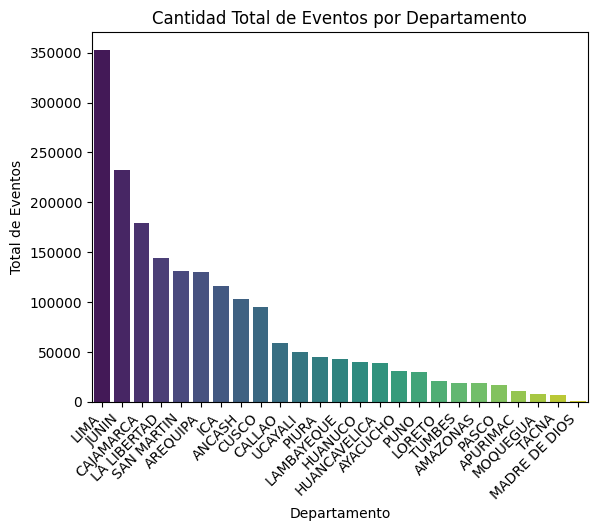

In [9]:
# Agrupar por departamento y calcular la suma de eventos
df_departamentos = data_salud.groupby("DEPARTAMENTO")["CANT_EVENTOS"].sum().reset_index()

# Ordenar el DataFrame de mayor a menor en base a "CANT_EVENTOS"
df_departamentos = df_departamentos.sort_values(by="CANT_EVENTOS", ascending=False)

# Gráfico
sns.barplot(
    x="DEPARTAMENTO",
    y="CANT_EVENTOS",
    data=df_departamentos,
    palette="viridis",
    hue="DEPARTAMENTO",  # Asignamos hue a la misma variable de x
    dodge=False  # Evita separar las barras en grupos
)
plt.legend([], [], frameon=False)  # Desactiva la leyenda
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad Total de Eventos por Departamento")
plt.ylabel("Total de Eventos")
plt.xlabel("Departamento")
plt.show()

 

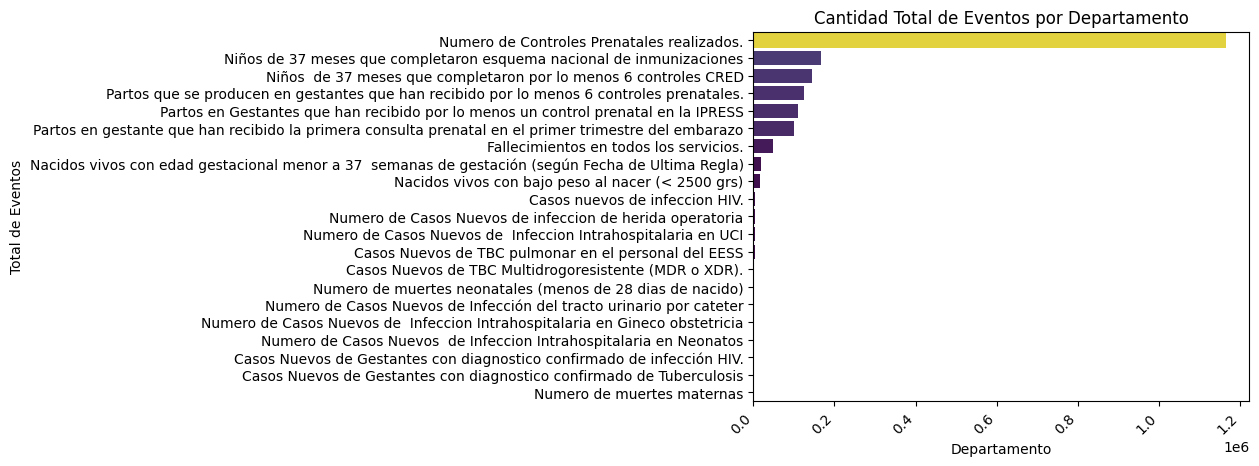

In [12]:
# Agrupar por departamento y calcular la suma de eventos
df_departamentos = data_salud.groupby("EVENTOS")["CANT_EVENTOS"].sum().reset_index()

# Ordenar el DataFrame de mayor a menor en base a "CANT_EVENTOS"
df_departamentos = df_departamentos.sort_values(by="CANT_EVENTOS", ascending=False)

# Gráfico
sns.barplot(
    x="CANT_EVENTOS",
    y="EVENTOS",
    data=df_departamentos,
    palette="viridis",
    hue="CANT_EVENTOS",  # Asignamos hue a la misma variable de x
    dodge=False  # Evita separar las barras en grupos
)
plt.legend([], [], frameon=False)  # Desactiva la leyenda
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad Total de Eventos)
plt.ylabel("Eventos")
plt.xlabel("N° de ocurriencias de los eventos")
plt.show()
